In [176]:
# Import Libarirs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [177]:
# Read the data

dataset = pd.read_csv("Housing.csv")

In [178]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [179]:
dataset.shape

(545, 13)

In [180]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


## Data Analysis

In [181]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


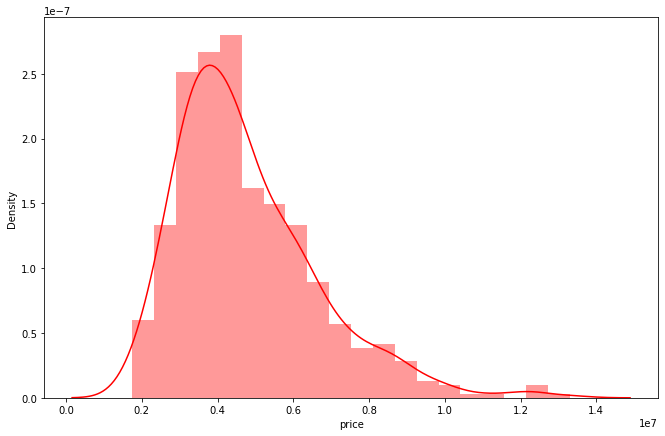

In [182]:
# Let us first analyze the distribution of target variable

plt.figure(figsize = (11, 7))
sns.distplot(dataset['price'], color = 'r', bins = 20)
plt.show()

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


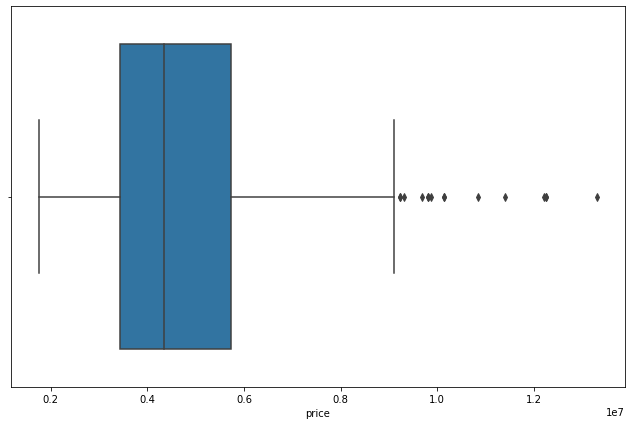

In [183]:
# Check Outliers

plt.figure(figsize = (11, 7))
sns.boxplot(dataset['price'])
plt.show()

C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


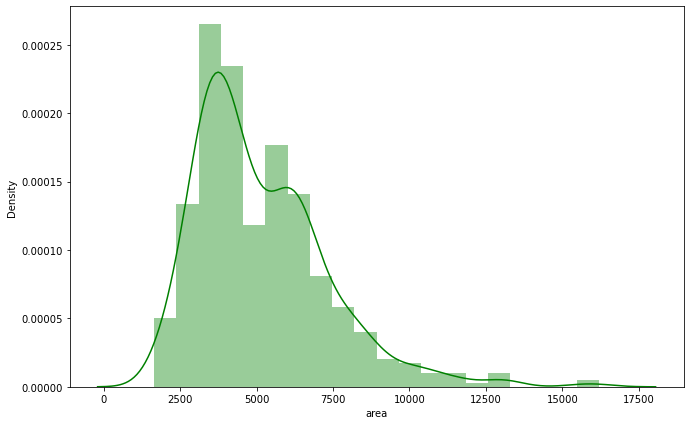

In [184]:
# Let us analyze the distribution of area variable

plt.figure(figsize = (11, 7))
sns.distplot(dataset['area'], color = 'g', bins = 20)
plt.show()

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


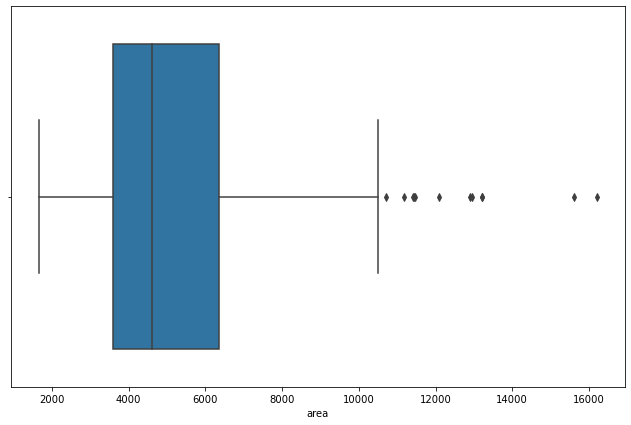

In [185]:
# Check Outliers

plt.figure(figsize = (11, 7))
sns.boxplot(dataset['area'])
plt.show()

<AxesSubplot:xlabel='area', ylabel='price'>

<Figure size 1008x648 with 0 Axes>

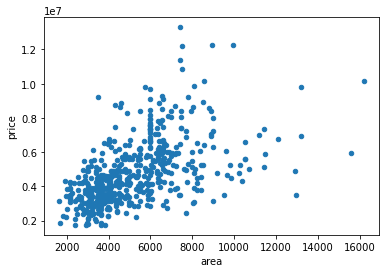

In [186]:
# Analyze the relation between price and area

plt.figure(figsize = (14, 9))
dataset.plot(kind='scatter', x='area', y='price')

In [187]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [188]:
num_data = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
target = dataset[['price']]

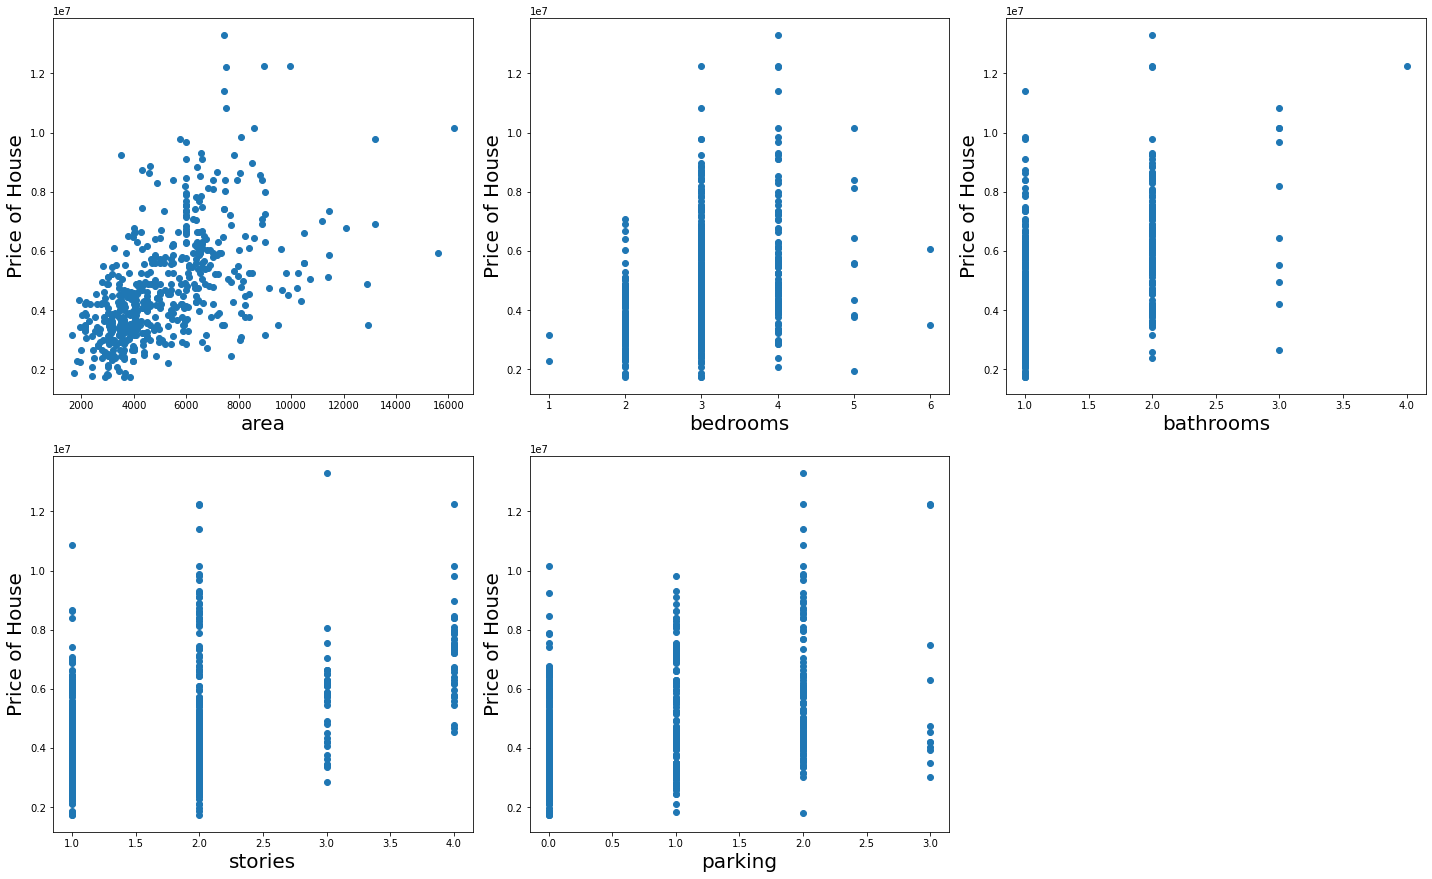

In [189]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in num_data:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(num_data[column], target)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price of House',fontsize=20)
    plotnumber+=1
plt.tight_layout()

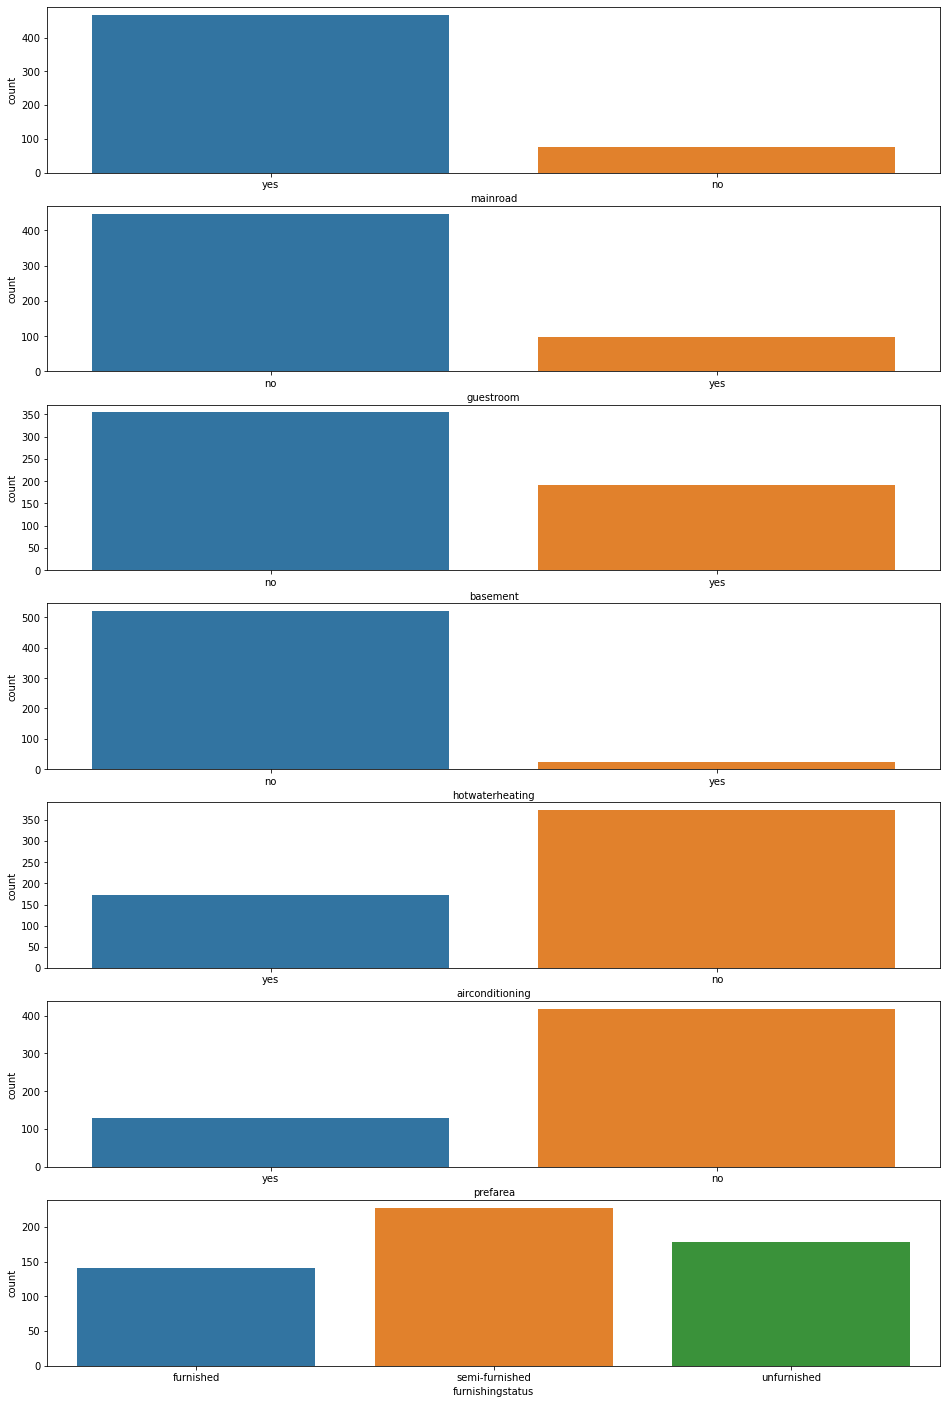

In [190]:
# lets analyze the categorical data

fig, ax = plt.subplots(nrows = 7, ncols = 1, figsize = (16, 25))
cols = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for i, col in enumerate(cols):
    sns.countplot(x = col, data = dataset, ax = ax[i])

In [191]:
# Handling Categorical Variables

from sklearn.preprocessing import LabelEncoder
cat_cols = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()

for x in cat_cols:
    dataset[x] = le.fit_transform(dataset[x])

In [192]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## Feature Selection / Extraction

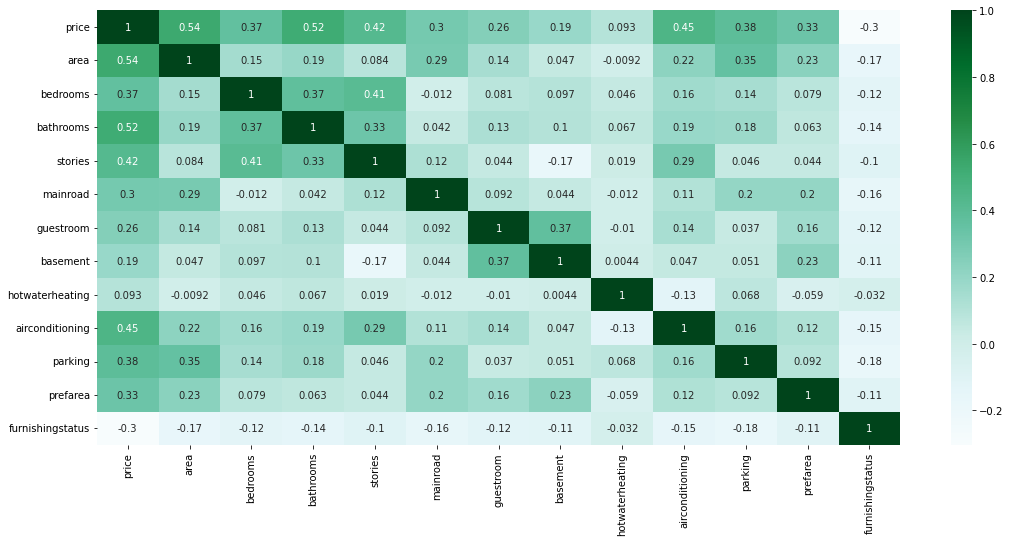

In [193]:
# Checking for correlation

plt.figure(figsize = (18, 8))
sns.heatmap(dataset.corr(), annot = True, cmap = 'BuGn')
plt.show()

In [194]:
## OLS Model

import statsmodels.formula.api as smf
lm = smf.ols(formula='price ~ area+bedrooms+bathrooms+stories+mainroad+guestroom+basement+airconditioning+parking+prefarea', data=dataset).fit()

In [195]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     105.3
Date:                Thu, 01 Sep 2022   Prob (F-statistic):          2.24e-119
Time:                        16:52:13   Log-Likelihood:                -8346.8
No. Observations:                 545   AIC:                         1.672e+04
Df Residuals:                     534   BIC:                         1.676e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.885e+05   2.42e+05     -1.192      0.234   -7.64e+05    1.87e+05
area              247.4362     24.874      9.948      0.000     198.573     296.299
bedrooms         1.346e+05   7.43e+04      1.811      0.071   -1.14e+04    2.81e+05
bathrooms         1.03e+06   1.06e+05      9.744      0.000    8.22e+05    1.24e+06
stories          4.656e+05   6.57e+04      7.083      0.000    3.37e+05    5.95e+05
mainroad          4.63e+05   1.45e+05      3.188      0.002    1.78e+05    7.48e+05
guestroom        3.179e+05   1.35e+05      2.356      0.019    5.28e+04    5.83e+05
basement         3.894e+05   1.13e+05      3.453      0.001    1.68e+05    6.11e+05
airconditioning  8.145e+05   1.09e+05      7.449      0.000       6e+05    1.03e+06
parking          3.172e+05   5.95e+04      5.328      0.000       2e+05    4.34e+05
prefarea         6.324e+05   1.18e+05      5.342      0.000       4e+05    8.65e+05
==============================================================================
Omnibus:                       98.795   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.673
Skew:                           0.901   Prob(JB):                     1.51e-57
Kurtosis:                       5.877   Cond. No.                     3.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [197]:
## Outlier Detection

Q1 = dataset.price.quantile(0.25)
Q3 = dataset.price.quantile(0.75)

IQR = Q3 - Q1
dataset = dataset[(dataset.price >= Q1 - 1.5*IQR) & (dataset.price <= Q3 + 1.5*IQR)]

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


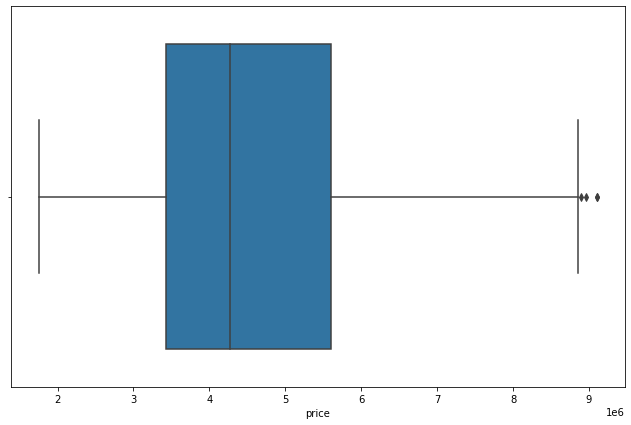

In [198]:
# Check Outliers after detection

plt.figure(figsize = (11, 7))
sns.boxplot(dataset['price'])
plt.show()

In [199]:
Q1 = dataset.area.quantile(0.25)
Q3 = dataset.area.quantile(0.75)

IQR = Q3 - Q1
dataset = dataset[(dataset.area >= Q1 - 1.5*IQR) & (dataset.area <= Q3 + 1.5*IQR)]

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


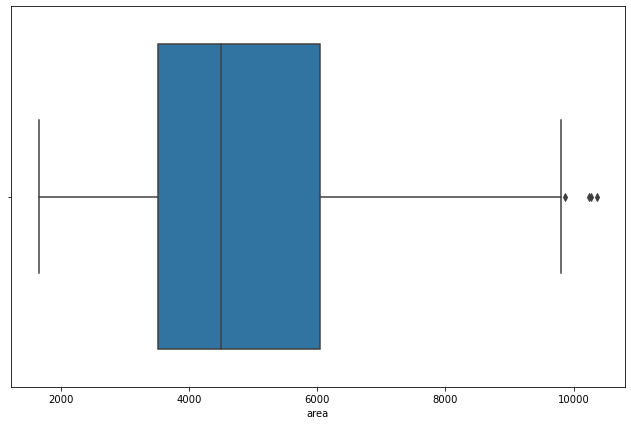

In [200]:
# Check Outliers after detection

plt.figure(figsize = (11, 7))
sns.boxplot(dataset['area'])
plt.show()

In [201]:
# Let's perform Normalization for feature scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [202]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [203]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

dataset[num_vars] = scaler.fit_transform(dataset[num_vars])

In [204]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,1.000000,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1
16,1.000000,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,2
17,0.980952,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0
18,0.971429,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0
19,0.966667,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1


In [205]:
# Split the features and target variable

X = dataset.drop(columns = ['price'])
y = dataset['price']

In [207]:
variables = X
variables.shape[1]

12

In [208]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [209]:
vif

,VIF,Features
0,5.684727,area
1,7.122760,bedrooms
2,1.639364,bathrooms
3,2.701095,stories
4,5.761873,mainroad
5,1.520987,guestroom
6,1.989828,basement
7,1.071736,hotwaterheating
8,1.742545,airconditioning
9,1.911509,parking


In [210]:
X.drop('furnishingstatus', axis = 1, inplace = True)

In [211]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
15,0.499426,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0
16,0.568312,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1
17,0.786452,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0
18,0.338691,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0
19,0.547646,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...
540,0.154994,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0
541,0.086108,0.4,0.0,0.000000,0,0,0,0,0,0.000000,0
542,0.226177,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0
543,0.144661,0.4,0.0,0.000000,0,0,0,0,0,0.000000,0


In [212]:
y

15     1.000000
16     1.000000
17     0.980952
18     0.971429
19     0.966667
         ...   
540    0.009524
541    0.002333
542    0.000000
543    0.000000
544    0.000000
Name: price, Length: 517, dtype: float64

## Model Building

In [213]:
# Split the dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [217]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((387, 11), (130, 11), (387,), (130,))

In [221]:
y_test

240    0.385714
463    0.180952
370    0.257143
257    0.371429
197    0.436190
         ...   
484    0.152381
510    0.104762
481    0.161905
267    0.360952
330    0.304762
Name: price, Length: 130, dtype: float64

In [215]:
# Fit the training data to Linear Regression Model

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [222]:
# Make Prediction on test data

y_pred = reg.predict(X_test)

## Model Evaluation

In [223]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09732483710993682
Mean Squared Error: 0.017745255015702073
Root Mean Squared Error: 0.1332113171457368


C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


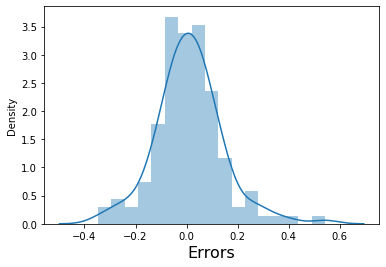

In [224]:
# Plot the distribution plot for the error term

fig = plt.figure()
sns.distplot(y_test - y_pred)
plt.xlabel('Errors', fontsize = 16)
plt.show()

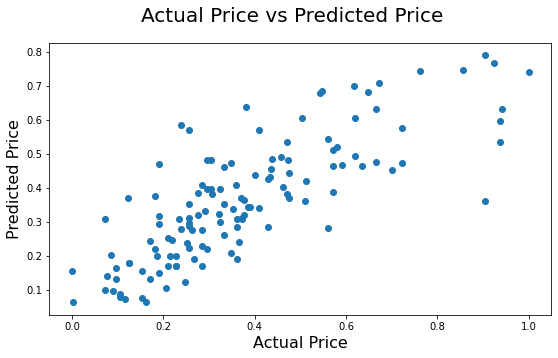

In [233]:
# Plot the scatter plot for the error term

fig = plt.figure(figsize = (9, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price', fontsize = 16)
plt.ylabel('Predicted Price', fontsize = 16)
plt.suptitle('Actual Price vs Predicted Price', fontsize = 20)

plt.show()

### Apply Regularizers to avoid any chance of overfitting

In [234]:
# Ridge Regression

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [235]:
# Make Prediction on test data

y_pred_ridge = ridge.predict(X_test)

In [236]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ridge))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ridge))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Mean Absolute Error: 0.09721757796763195
Mean Squared Error: 0.017732880558228303
Root Mean Squared Error: 0.13316486232572128


In [237]:
# Lasso Regression

from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)

Lasso()

In [238]:
# Make Prediction on test data

y_pred_l = lasso.predict(X_test)

In [240]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_l))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_l))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

Mean Absolute Error: 0.17395453578290787
Mean Squared Error: 0.04814338173678766
Root Mean Squared Error: 0.21941600155136284


C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


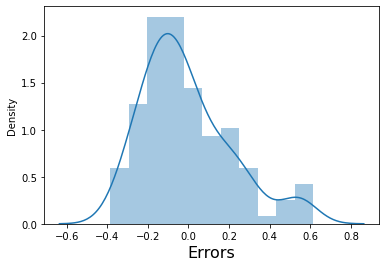

In [241]:
# Plot the distribution plot for the error term

fig = plt.figure()
sns.distplot(y_test - y_pred_l)
plt.xlabel('Errors', fontsize = 16)
plt.show()

In [248]:
X_test.loc[240].T

area               0.251435
bedrooms           0.400000
bathrooms          0.000000
stories            0.333333
mainroad           1.000000
guestroom          0.000000
basement           0.000000
hotwaterheating    0.000000
airconditioning    0.000000
parking            0.333333
prefarea           1.000000
Name: 240, dtype: float64

## Building a Predictive System


In [250]:
input_data = (0.251435, 0.40000, 0, 0.3333, 1, 0, 0, 0, 0, 0, 1)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1, -1)

prediction = reg.predict(input_data_reshaped)

print('The price for the house is:', prediction[0])

The price for the house is: 0.3169689730190652


C:\Users\om\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
